# **US Rental House Price Prediction using Machine Learning**

---

#### **Author:** Kartik

#### **Contact:** kkakar664@gmail.com

#### **Date:** Oct 17, 2023

## Table of Contents

1. [Introduction](#intro)
2. [Loading and Setup](#loading)
3. [Assessment](#assessment)
4. [EDA](#eda)
    - [Preliminary checks](#checks)
    - [Dealing with outliers](#dealing)
    - [Post removal checks](#revised)
    - [Relationships between Variables](#relationship)

## Introduction <a class="anchor" id="intro"></a>
---

In this **Exploratory Data Analysis (EDA)** notebook, we will delve into a meticulously cleaned dataset that has undergone thorough preprocessing to ensure data integrity. The aim of this analysis is to unlock valuable insights and patterns hidden within our dataset, shedding light on various aspects of it's features and their relationships. EDA is an essential preliminary step in the data analysis process, enabling us to understand the characteristics of the dataset, identify potential outliers, explore distributions and reveal correlations. 

## Loading and Setup <a class="anchor" id="loading"></a>
---

We will start by importing the necessary libraries.

In [250]:
# If the libraries are not preinstalled, please uncomment the following and install as needed:
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install seaborn
# pip install plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

In [251]:
# So we don't have to write 'print' everytime we want to display the output.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [252]:
# Load our cleaned dataset called "cleaned_dataset"
df = pd.read_csv('cleaned_dataset.csv')

## Assessment <a class="anchor" id="assessment"></a>
---

We will get an **overview** of our dataset that was cleaned previously. This is a **preliminary check** before we get into any statistical analysis and visualization of our data. 

In [253]:
# Set display options to show all columns.
pd.set_option('display.max_columns', None)

In [254]:
# Display df
df

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,off-street parking,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381733,reno / tahoe,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport,ca
381734,reno / tahoe,1549,apartment,1034,2,2.0,1,1,0,0,0,0,w/d in unit,off-street parking,ca
381735,reno / tahoe,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,ca
381736,reno / tahoe,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport,ca


In [255]:
# Get the shape of our dataset.
df.shape

(381738, 15)

Our dataset has **381,738 rows** and **15 columns**. 

In [256]:
# Display the first 5  rows of the dataframe (df) to get an overview of the provided data. 
df.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,off-street parking,ca


In [257]:
# Display all the column names as a list.
df.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'state'],
      dtype='object')

In [258]:
# Information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381738 entries, 0 to 381737
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   381738 non-null  object 
 1   price                    381738 non-null  int64  
 2   type                     381738 non-null  object 
 3   sqfeet                   381738 non-null  int64  
 4   beds                     381738 non-null  int64  
 5   baths                    381738 non-null  float64
 6   cats_allowed             381738 non-null  int64  
 7   dogs_allowed             381738 non-null  int64  
 8   smoking_allowed          381738 non-null  int64  
 9   wheelchair_access        381738 non-null  int64  
 10  electric_vehicle_charge  381738 non-null  int64  
 11  comes_furnished          381738 non-null  int64  
 12  laundry_options          381738 non-null  object 
 13  parking_options          381738 non-null  object 
 14  stat

#### Methodology:

The provided information is a summary of a pandas DataFrame that has undergone some data preprocessing or filtering and data cleaning, and the output represents the current state of the DataFrame after these operations.

Based on this summary:

1. The dataframe comprises of **381,738 entries** indicating the number of rows.

2. There are **15 columns** present in the dataframe.

3. The column names include ***'region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options'*** and ***'state'***.

4. **NaN values**: There are no 'NaN' values in this dataframe. They were all dealt with during the data cleaning stage.

5. The data types of the columns are as follows:

    - **int64**: 'price', 'sqfeet', 'beds', 'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge' and 'comes_furnished'.
    - **float64**: 'baths'
    - **Object (string)**: 'region', 'type', 'laundry_options', 'parking_options' and 'state'.
    
6. There are **No duplicated rows** in our dataset.
    
6. The dataframe consumes approximately **43.7+ MB** of memory.

This information is highly valuable for comprehending the data's structure, facilitating subsequent data analysis decisions. For instance, understanding the data types of columns aids in selecting appropriate statistical methods.

---

After acquiring basic knowledge about our dataset, we will dig deep into the **statistical side** of data. We will learn more about the key statistics for each column, such as ***mean, standard deviation, min, max*** and ***quartiles***. It helps in gaining a quick overview of the data's distribution and characteristics.

In [259]:
# Get a statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,381738.0,8897.797487,4.481090e+06,106.0,814.0,1043.0,1399.0,2.768307e+09
sqfeet,381738.0,1062.350814,1.922965e+04,120.0,750.0,950.0,1150.0,8.388607e+06
beds,381738.0,1.902250,3.114062e+00,0.0,1.0,2.0,2.0,1.100000e+03
baths,381738.0,1.535346,6.673239e-01,0.0,1.0,1.0,2.0,7.500000e+01
cats_allowed,381738.0,0.728238,4.448686e-01,0.0,0.0,1.0,1.0,1.000000e+00
dogs_allowed,381738.0,0.709125,4.541665e-01,0.0,0.0,1.0,1.0,1.000000e+00
smoking_allowed,381738.0,0.732107,4.428622e-01,0.0,0.0,1.0,1.0,1.000000e+00
wheelchair_access,381738.0,0.082148,2.745904e-01,0.0,0.0,0.0,0.0,1.000000e+00
electric_vehicle_charge,381738.0,0.012933,1.129855e-01,0.0,0.0,0.0,0.0,1.000000e+00
comes_furnished,381738.0,0.047682,2.130926e-01,0.0,0.0,0.0,0.0,1.000000e+00


#### Interpretetion

1. **Price ('price' per Month)**: 
    - The mean price is approximately 8897.80, indicating an average rental price.
    - The minimum price is 106, and the maximum price is 2.77e+09, showing a wide price range.
    - The majority of prices (25th to 75th percentile) fall between 814 and 1399.

2. **Square Footage ('sqfeet'):**
    - The mean square footage is around 1062.35, suggesting an average-sized living space.
    - Square footage varies widely, with a minimum of 120 and a maximum of 8.38e+06.
    - The interquartile range (25th to 75th percentile) spans from 750 to 1150.
    
3. **Number of Bedrooms ('beds'):**
    - The average number of bedrooms is approximately 1.90 (or 2).
    - Bedrooms range from 0 to 1100, with the majority having 1 or 2 bedrooms. Higher end could be the outliers. 
    
4. **Number of Bathrooms ('baths'):**
    - On average, there are about 1.54 bathrooms.
    - Most listings have 1 or 2 bathrooms, but the maximum is exceptionally high at 75, potentially indicating outliers.

5. **cats_allowed, dogs_allowed, smoking_allowed:**
    - These columns represent binary (0 or 1) values indicating permissions, 1 for Yes and 0 for No.
    - On average, the majority of listings allow cats, dogs, and smoking, with values around 0.7.

6. **wheelchair_access** and **electric_vehicle_charge:**
    - These columns also contain binary values.
    - Wheelchair access and electric vehicle charge are less common, with averages around 0.08 and 0.01, respectively.

7. **comes_furnished:**
    - Most listings are not furnished, with an average of less than 0.05 indicating limited furnished options.


#### Findings

This informaiton provide insights into the characteristics of our DataFame, including price distribution, property sizes, bedroom and bathroom counts, and the prevalence of certain amenities or restrictions in rental properties. The presence of potential outliers, such as extremely high bathroom and bedroom counts, should be further investigated during data analysis.

---

## Exploratory Data Analysis (EDA) <a class="anchor" id="eda"></a>
---

We will start with our Exploratory Data Analysis (EDA) to look for any patterns, anomalies, and critical insights within our data. We will check for any relationships between our variables, visualize dependencies and modify our data according to those correlations. 

Let's find out the correlation coefficient of our numeric variables. 

In [260]:
# We'll build a simple correlation matrix to check for relationships between variables.

# Selecting all the numeric coluns.
numerical_columns = ['price', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished']

<Figure size 1000x800 with 0 Axes>

<Axes: >

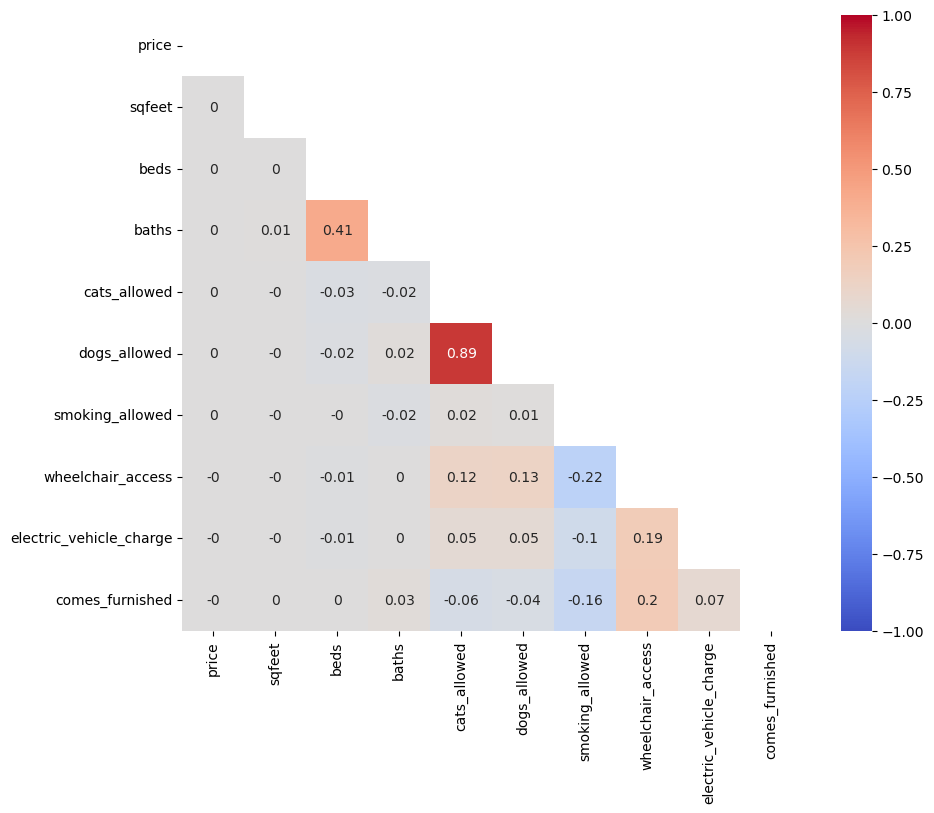

In [261]:
# Creating a Heatmap
# Mask for upper-triangular
mask = np.triu(df[numerical_columns].corr())

plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_columns].corr().round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

#### Interpretetion

The **correlation coefficient** is a statistical measure that calculates the strength of the relationship between the relative movements of **two variables**. The values range between **-1.0 and 1.0**. A correlation of **-1.00 shows a perfect negative correlation**, while a correlation of **1.0 shows a perfect positive correlation**. A correlation of **0.0 shows no linear relationship** between the movement of the two variables.

The heatmap visually represents the correlation matrix for the **numerical columns** in the dataset. Each cell's colour in the heatmap reflects the strength and direction of the correlation, with **darker colours indicating a stronger correlation** and **lighter ones representing weaker correlation**. Positive correlations are depicted with warm colours like red, while negative correlations are shown with cool colors like blue. The numbers within each cell represent the correlation coefficients, ranging from -1 to 1.

#### Findings

- **'baths'** and **'beds'** column have a **high correlation of 0.41** which is to be expected. 
- **'dogs_allowed'** and **'cats_allowed'** have a very **high correlation of 0.89**. 
- The rest of the variables doesn't seem to have a lot of interdependencies between each other demonstrated by lighter colors. 

---

### Let's look at our Variables individually <a class="anchor" id="checks"></a>

**From here onwards, we will:**

 **1.** Take a look at the statistical data of each of our variables.<br>
 **2.** Visualize their distribution.<br>
 **3.** Analyse the graphs.<br>
 **4.** Deal with any Outliers or any other problems.<br>
 **5.** Visualize again to see differences.<br>
 **6.** Study any patterns or trends in our visualizations.<br>

---

### 1. Price

First, we will look at our **"price"** column which is our **Target variable**, this is what we're trying to predict with our upcoming Machine Learning model. 

In [262]:
# Get description of this column
df.price.describe().apply(lambda x: format(x, 'f'))

count        381738.000000
mean           8897.797487
std         4481090.478810
min             106.000000
25%             814.000000
50%            1043.000000
75%            1399.000000
max      2768307249.000000
Name: price, dtype: object

**`Finding:`**  We see that the mean price is very high. Probably because of the extremely high "max" amount in this column.

We will visualize it for a better view.

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='price'>

Text(0.5, 1.0, 'Distribution of price')

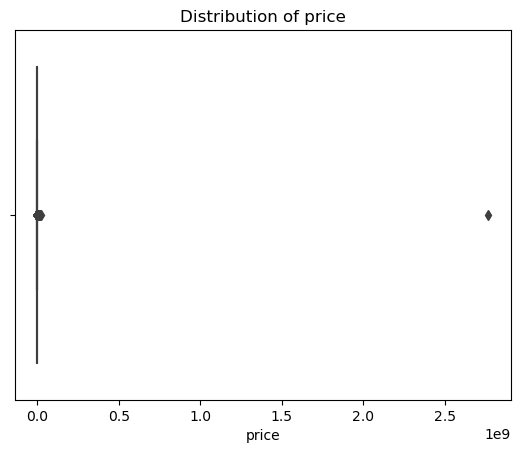

In [263]:
# Create the box plot
plt.figure()
sns.boxplot(x="price", data=df)
plt.title("Distribution of price")

plt.show()

##### Interpretetion

This boxplot doesn't give out too much information because of the extremly large outlier. As we can see, the graph is skewed alot. We will be dealing with this by putting limiter on our price input. 

### 2. Square Feet

In [264]:
# Get description of this column.
df.sqfeet.describe().apply(lambda x: format(x, 'f'))

count     381738.000000
mean        1062.350814
std        19229.654022
min          120.000000
25%          750.000000
50%          950.000000
75%         1150.000000
max      8388607.000000
Name: sqfeet, dtype: object

**`Finding:`**  Similar to 'price', the average 'sq feet' (mean) seems to be inflated. Also because of the extremely high "max" amount in this column, 8,388,607.00. This outlier is highly unrealistic and have to be dealt with by limiting the area we will be using in our model.

In [265]:
# Value counts of each unique item in this column. 
df['sqfeet'].value_counts()

sqfeet
1000    10075
900      8469
1100     6955
800      6871
700      6649
        ...  
2964        1
2893        1
2711        1
3019        1
3006        1
Name: count, Length: 3209, dtype: int64

Let's visualize it using a Boxplot.

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='sqfeet'>

Text(0.5, 1.0, 'Distribution of sq. feet')

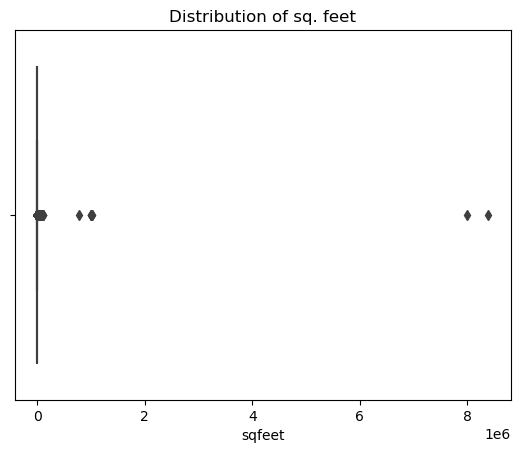

In [266]:
# Create the box plot
plt.figure()
sns.boxplot(x="sqfeet", data=df)
plt.title("Distribution of sq. feet")

plt.show()

##### Interpretetion

This graph is also not that helpful because it skewed largly towards the outlier inflating the statistical data. So, before we can use this, we have to make it more realistic by removing that outlier and work with better dataset. 

### 3. Beds

In [267]:
# Get description of this column.
df.beds.describe().apply(lambda x: format(x, 'f'))

count    381738.000000
mean          1.902250
std           3.114062
min           0.000000
25%           1.000000
50%           2.000000
75%           2.000000
max        1100.000000
Name: beds, dtype: object

Looking at the value counts of each item in this column suggests us that anything more than 8 bedrooms, i.e, 1000 and 1100 are our outliers because it is highly unlikely that some rental have that many bedrooms to rent. This could be misinformation or a typo.So, we will be dealing with them. 

In [268]:
# Value counts of each unique item in this column. 
df['beds'].value_counts()

beds
2       174205
1       116202
3        66430
4        11443
0        10881
5         2264
6          232
7           49
8           29
1100         2
1000         1
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='beds', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Beds')

Text(0.5, 0, 'Number of Beds')

Text(0, 0.5, 'Count')

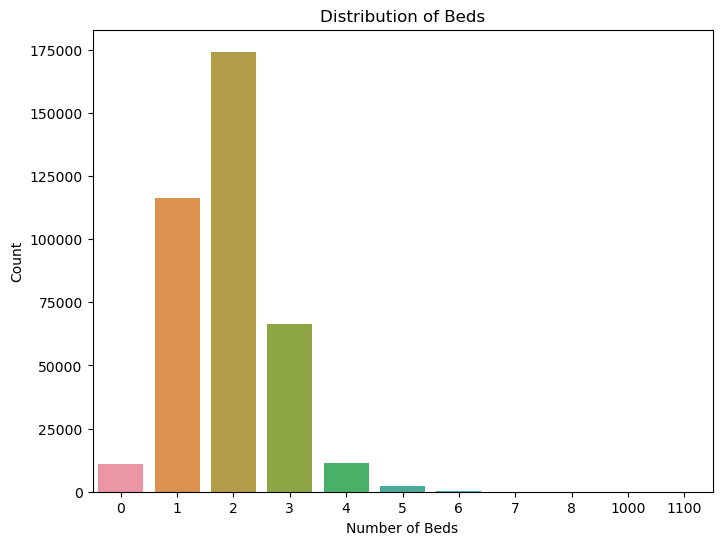

In [269]:
# Visualize the information on a graph.
plt.figure(figsize=(8, 6))
sns.countplot(x="beds", data=df)
plt.title("Distribution of Beds")
plt.xlabel("Number of Beds")
plt.ylabel("Count")

# Show the bar chart
plt.show()

##### Interpretetion

- The most common number of bedrooms is **2**, with **174,205** listings having this number.
- **One-bedroom** apartments are also pretty common, with **116,202** listings.
- **Three-bedroom** apartments come next in frequency, with **66,430** listings.
- **Four-bedroom** apartments are less common but still substantial, with **11,443** listings.
- Some listings have **zero** bedrooms, which might indicate studios or other unconventional setups, totaling **10,881**.
- Apartments with **five bedrooms** are relatively rare, with **2,264** listings.
- Listings with **six, seven**, and **eight** bedrooms are even less common.
- There are a couple of listings with an unusually high number of bedrooms, such as **1,100** and **1,000**, which may be data anomalies / outliers.

### 4. Baths

In [270]:
# Get statistical description of this column.
df.baths.describe().apply(lambda x: format(x, 'f'))

count    381738.000000
mean          1.535346
std           0.667324
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          75.000000
Name: baths, dtype: object

**`Finding:`**  The average number of bathrooms is very high, probably due to the really high value of the max number of bathrooms (75).  

In [271]:
df['baths'].value_counts()

baths
1.0     196197
2.0     161065
3.0      18551
0.0       3063
4.0       2453
5.0        318
6.0         77
7.0          8
75.0         2
8.0          2
9.0          1
25.0         1
Name: count, dtype: int64

We will visualize this information and interpret it. 

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='baths', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Baths')

Text(0.5, 0, 'Number of Beds')

Text(0, 0.5, 'Count')

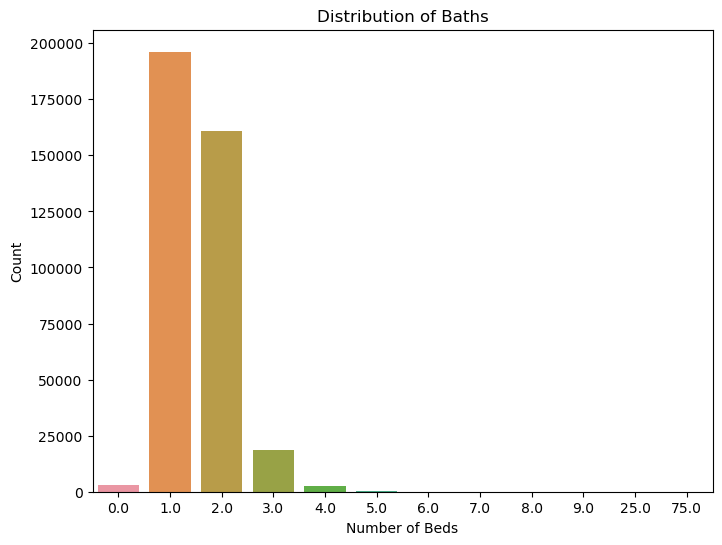

In [272]:
# bar chart for the 'baths' column
plt.figure(figsize=(8, 6))
sns.countplot(x="baths", data=df)
plt.title("Distribution of Baths")
plt.xlabel("Number of Beds")
plt.ylabel("Count")

# Show the bar chart
plt.show()

##### Interpretetion

- The most frequent bathroom count is **1**, found in **196,197** listings, making it the most common configuration.
- A **two-bathroom** setup is also prevalent, with **161,065** listings.
- **Three-bathroom** units are less common but still significant, totaling **18,551** listings.
- An interesting observation is that some listings have **no bathrooms (3,063 instances)**, potentially due to anomalies or unconventional housing types.
- **Four-bathroom** apartments are less common, accounting for **2,453** listings.
- Apartments with **five, six, seven, or eight** bathrooms become progressively scarcer.
- Unusual outliers include listings with exceptionally high bathroom counts, such as **75, 9, and 25**, which could be data anomalies.

---

#### <mark>These findings parallel the Heatmap proving that there is a high correlation between Number of Bedrooms and Number of Bathrooms.</mark>

---

Now, as we are armed with the knowledge of the outliers in the ***'price', 'sqfeet', 'beds'*** and ***'baths'*** columns, we have to deal with them accordingly to get a cleaner dataset. 

### Remove outliers 
There are clearly some **major outliers** unless somebody listed a magic house with 1,100 bedrooms and 75 baths. The following code removes any rows with outliers with a price lying **beyond $5000, square footage beyond 4000 feet, and beyond 3 standard deviations of the mean for beds**. For baths, we will deal with it differently. 

Before modifying our dataset, we will make a copy of the DataFrame and name it **'df1'**, so we would be able to retrieve the original information if needed. 

In [273]:
# Making a copy of our dataset.
df1 = df.copy()

In [274]:
# Sanity check
df1.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,off-street parking,ca


In [275]:
# Getting rows and columns
df1.shape

(381738, 15)

Currently, there are **381,738 entries** and **15 features** in our copied dataset called **df1.**

---

### Dealing with outliers <a class="anchor" id="dealing"></a>

In [276]:
# For 'price' column
df1 = df[df.price <= 5000]

# For 'sqfeet' column
df1 = df1[df1.sqfeet <= 4000]

# For 'beds' column
df1 = df1[np.abs(df1.beds-df.beds.mean()) <= (3 * df1.beds.std())]

# For 'beds' column
# List of values to remove (outliers)
outliers = [5.0, 6.0, 7.0, 8.0]

# Remove the outliers from the DataFrame
df1 = df1[~df1['baths'].isin(outliers)]


# Print out the number of rows dropped.
print(f"{df.shape[0] - df1.shape[0]} rows removed")

1585 rows removed


#### Methodology

We dealt with the outiers in the following way:
 
**1.** `df1 = df[df.price <= 5000]` <br>
       This code filters from the original dataframe 'df' and alter our current dataframe 'df1' containing rows where the 'price' column values are less than or equal to $5,000. It removes outliers in terms of price to focus on more typical and realistic rental prices.

**2.** `df1 = df1[df1.sqfeet <= 4000]` <br>
       This line further refines 'df1' by filtering rows where the 'sqfeet' (square footage) column values are less than or equal to 4,000 square feet. This step removes outliers in terms of the size of the rental units deflating the high mean. 

**3.** `df1 = df1[np.abs(df1.beds-df.beds.mean()) <= (3 * df1.beds.std())]` <br>
      'df1' is once again filtered, this time to remove rows where the 'beds' column values are more than 3 standard deviations away from the mean of 'beds.' This step is intended to remove outliers in the number of bedrooms.
      
**4.** `df1 = df1[~df1['baths'].isin(outliers)]` <br>
      A list called 'outliers' is defined, containing specific values (5.0, 6.0, 7.0, 8.0) that are considered outliers for the 'baths' column. The DataFrame 'df1' is filtered again to remove rows where the 'baths' column values match any of the values in the 'outliers' list. The '~' operator negates the condition, effectively removing rows with 'baths' values that are not in the list of outliers.

**5.** Then, we are calculating and printing the number of rows removed, which indicates the impact of outlier removal on the dataset's size and distribution.

Overall, this code is performing data preprocessing by eliminating outliers in ***'price', 'sqfeet', 'beds'*** and ***'baths'*** columns to create a cleaner and more focused dataset.

In [277]:
# Sanity check
print(f'Remaining number of rows: {df1.shape[0]}, remaining number of column: {df1.shape[1]}')

Remaining number of rows: 380153, remaining number of column: 15


---

#### Now, that we have successfully removed all the outliers, we can visualize the variables in our dataset again and try to find any patterns or trends. <a class="anchor" id="revised"></a>

Lets visualize the makeup of price, sqfeet, beds, and baths

### 1. Revised 'price' column

In [278]:
# Get statistical description of this column
df1.price.describe().apply(lambda x: format(x, 'f'))

count    380153.000000
mean       1177.464132
std         546.848114
min         106.000000
25%         812.000000
50%        1040.000000
75%        1395.000000
max        5000.000000
Name: price, dtype: object

**`Finding:`** As we can see, the **maximum amount of price is now 5000 USD which has reduced the mean considerably (1177.46)**. This is much more realistic than the previous data and will be beneficial in our data modelling step.  

Let's visualize it. We will be making 3 graphs for this, to ensure that the information we have is suitable fo the model. 

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Price')

Text(0.5, 0, 'Price per month')

Text(0, 0.5, 'Value Count')

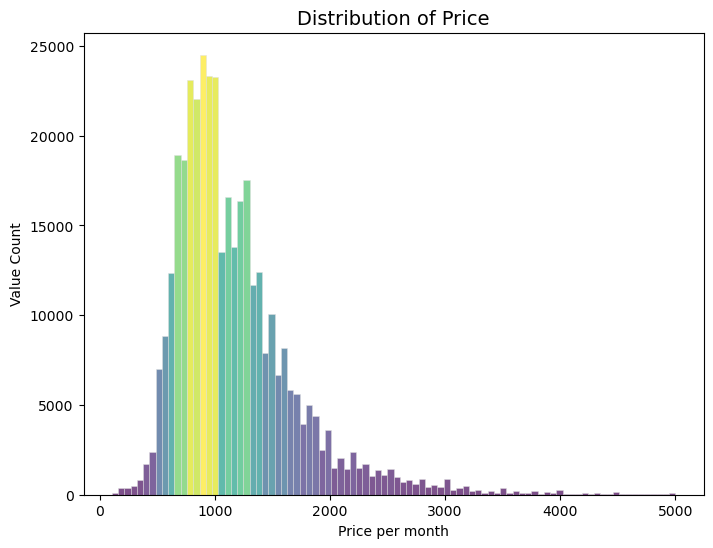

In [279]:
#1 Creating a histogram
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(df1['price'], bins=90, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
n = n.astype('int')

# Set bar colors based on the count
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i] / max(n)))

plt.title('Distribution of Price', fontsize=14)
plt.xlabel('Price per month')
plt.ylabel('Value Count')

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='price'>

Text(0.5, 1.0, 'Distribution of Price')

Text(0.5, 0, 'Price per month')

Text(0, 0.5, 'Value Count')

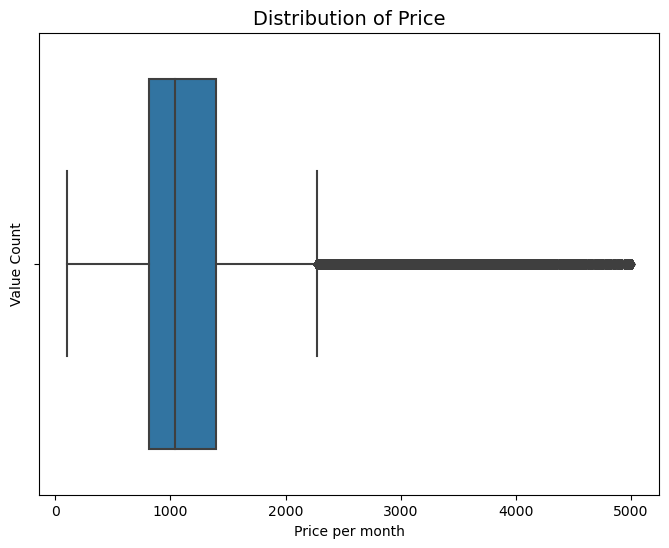

In [280]:
# 2 Create a boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x="price", data=df1)
plt.title('Distribution of Price', fontsize=14)
plt.xlabel('Price per month')
plt.ylabel('Value Count')

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='price', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of Price')

Text(0.5, 0, 'Price per month')

Text(0, 0.5, 'Value Count')

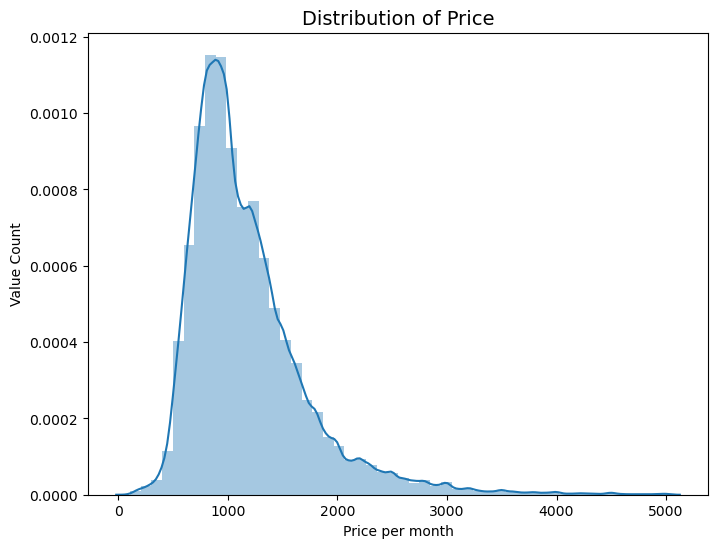

In [281]:
#3 Create a  displot graph.
plt.figure(figsize=(8,6))
sns.distplot(df1["price"])
plt.title('Distribution of Price', fontsize=14)
plt.xlabel('Price per month')
plt.ylabel('Value Count')

#### Finding

- In all three graphs, we can see that most of the places are listed between **700 USD** and **1300 USD**.
- The average rent is **1177.46 USD**.
- The graph follows a normal distribution but is still skewed a little to the high values on the right. 
- On the boxplot, we can see that anything after **approx 2300 USD** are still considered as outliers. 

### 2. Revised 'sqfeet' column

In [282]:
# Get statistical description of this column
df1.sqfeet.describe().apply(lambda x: format(x, 'f'))

count    380153.000000
mean        989.757264
std         365.509826
min         120.000000
25%         750.000000
50%         949.000000
75%        1147.000000
max        4000.000000
Name: sqfeet, dtype: object

**`Finding:`** Similar to price, the average area of a rental has deflated **(989.76)** after capping the maximum amount. Now, this is much more usable than before because it will give us more reallistic analysis. 

Also, same as price, we will visualize it with 3 graphs to support our analysis.

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Square Footage Distribution')

Text(0.5, 0, 'Square Footage')

Text(0, 0.5, 'Count')

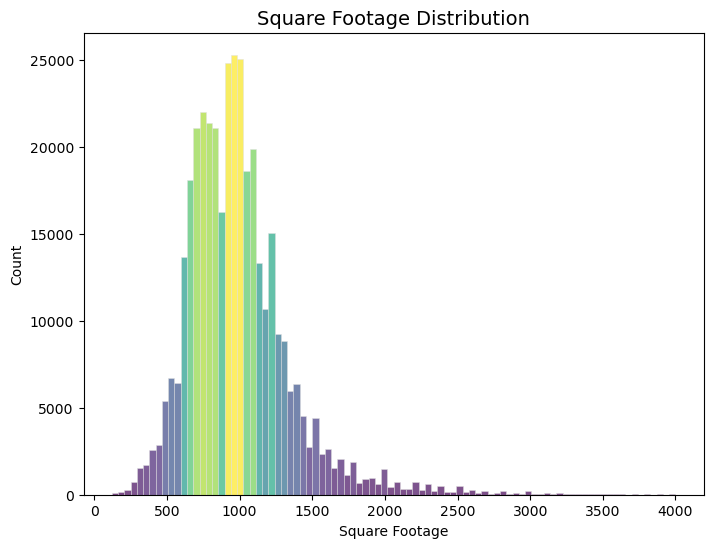

In [283]:
#1 Create a histogram using Matplotlib
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(df1['sqfeet'], bins=90, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
n = n.astype('int')

# Set bar colors based on the count
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i] / max(n)))

plt.title('Square Footage Distribution', fontsize=14)
plt.xlabel('Square Footage')
plt.ylabel('Count')

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='sqfeet'>

Text(0.5, 1.0, 'Square Footage Distribution')

Text(0.5, 0, 'Square Footage')

Text(0, 0.5, 'Count')

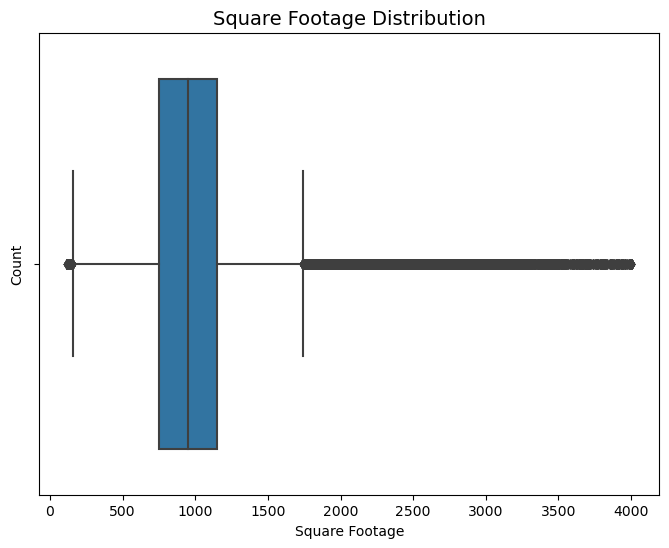

In [284]:
# Create a box plot
plt.figure(figsize=(8,6))
sns.boxplot(x="sqfeet", data=df1)
plt.title('Square Footage Distribution', fontsize=14)
plt.xlabel('Square Footage')
plt.ylabel('Count')

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='sqfeet', ylabel='Density'>

Text(0.5, 1.0, 'Square Footage Distribution')

Text(0.5, 0, 'Square Footage')

Text(0, 0.5, 'Count')

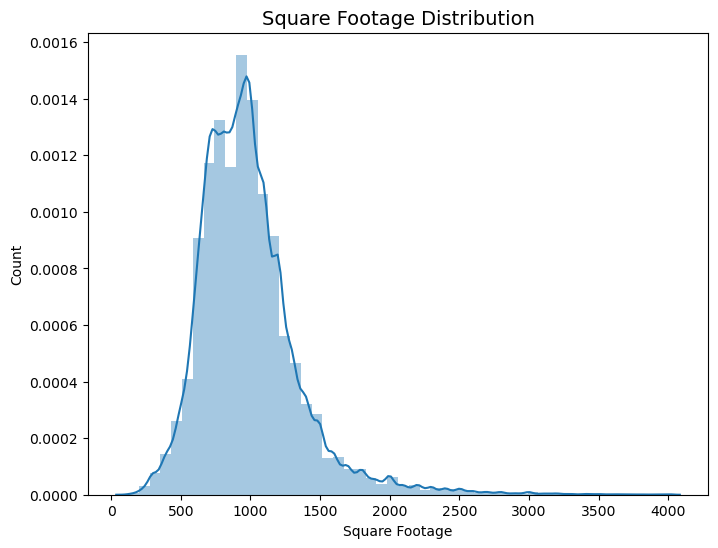

In [285]:
# Create a distplot
plt.figure(figsize=(8,6))
sns.distplot(df1["sqfeet"])
plt.title('Square Footage Distribution', fontsize=14)
plt.xlabel('Square Footage')
plt.ylabel('Count')

#### Finding

- In all three graphs, we can notice that area-wise, most of the rentals range between **600 sq.ft.** and **1300 sq. ft.**
- The average area is **989.76 sq. ft.**
- The graph generally follows a normal distribution but is still skewed a little to the high values on the right. 
- On the boxplot, we can see that anything after **approx 1700** are still considered as outliers. 

### 3. Revised 'beds' column

In [286]:
# Value counts of each unique item in this table
df1['beds'].value_counts()

beds
2    173882
1    116069
3     66018
4     11068
0     10857
5      2045
6       170
7        25
8        19
Name: count, dtype: int64

These are the individual value counts of all the unique items in the column 'beds'. We will visualize it and note our findings:

<Figure size 800x800 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Bedrooms')

Text(0.5, 0, 'Number of Bedrooms')

Text(0, 0.5, 'Count')

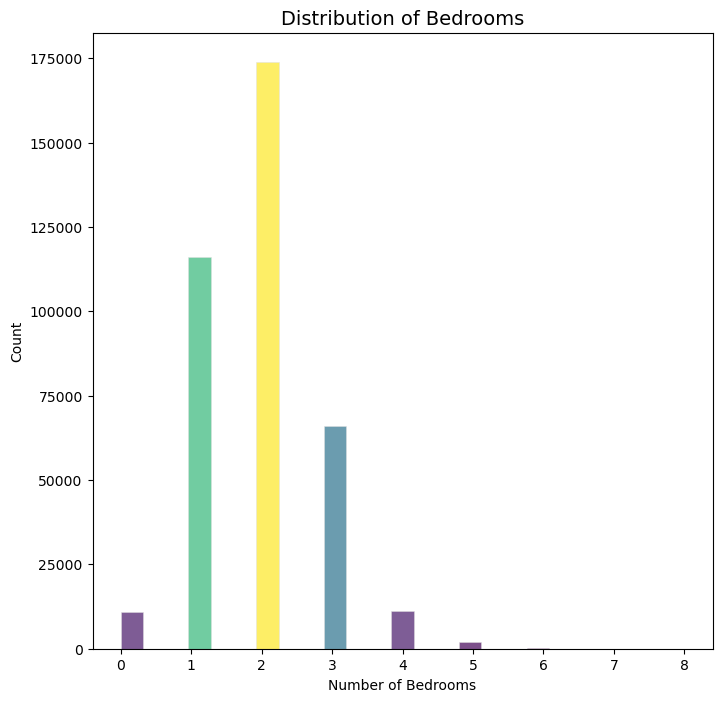

In [287]:
# Plot the graph
plt.figure(figsize=(8, 8))
n, bins, patches = plt.hist(df1['beds'], bins=25, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
n = n.astype('int')

# Set bar colors based on the count
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i] / max(n)))

plt.title('Distribution of Bedrooms', fontsize=14)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

# Show the Matplotlib plot
plt.show()

#### Interpretetion

The output represents the distribution of the number of bedrooms in the 'beds' column:

- **Two-bedroom units** are the most common, with **173,902** listings, making them the predominant configuration.
- **One-bedroom units** are also prevalent, with **116,075** listings.
- **Three-bedroom unit** are the next most common, found in **66,024** listings.
- **Four-bedroom units** are less common, with **11,236** listings.
- There are also a significant number of listings with **no specified bedroom count**, totaling **10,861.**
- Units with **five, six, seven** and **eight bedroom**s become progressively **rarer**.

### 4. Revised 'baths' column

In [288]:
# Value count of remaining unique values in this column
df1['baths'].value_counts()

baths
1.0    195995
2.0    160599
3.0     18227
0.0      3047
4.0      2285
Name: count, dtype: int64

After removing the outliers, we are left with 5 distinct values: **0.0, 1.0, 2.0, 3.0 and 4.0**

We will plot their value counts on a bar graph.

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='baths'>

Text(0.5, 1.0, 'Distribution of Bathrooms')

Text(0.5, 0, 'Number of Bathrooms')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '0.0'),
  Text(4, 0, '4.0')])

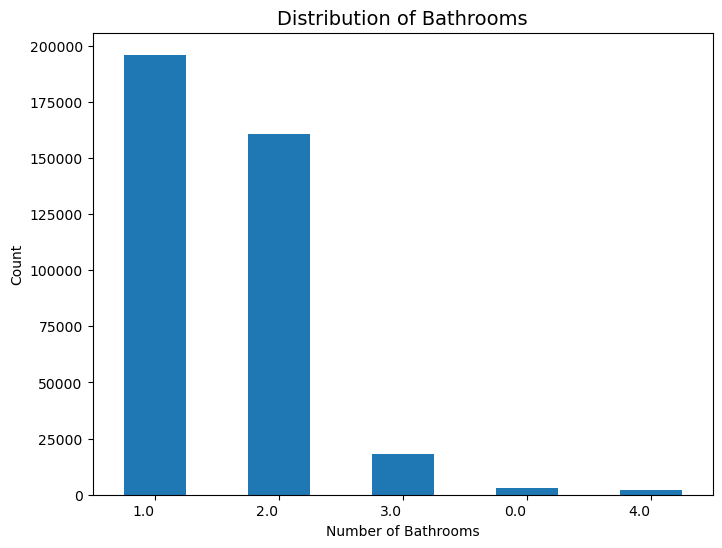

In [289]:
# Plot the bar graph
plt.figure(figsize=(8,6))
df1['baths'].value_counts().plot(kind='bar')

plt.title('Distribution of Bathrooms', fontsize=14)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.xticks(rotation=360, ha="right")
# Show the plot
plt.show()

#### Interpretetion

- The most common if **one bathroom**, accounting for **195,995** listings, indicating their prevalence.
- **Two-bathroom** units are also widely available, with **160,599** listings.
- Although less common, **three-bathroom** units are still substantial, with **18,227** listings.
- Notably, some listings show **zero bathrooms**, totaling **3,047**, which could represent atypical or unique property types.
- **Four-bathroom** units are less commonly found, with **2,285** listing.

---

#### After looking at the variables individually, now we will compare them with out target variable 'price' and spot any patterns or trends. 

---

### Comparing price and square footage <a class="anchor" id="relationship"></a>

Lets build a simple line graph to see how the monthly rent of a listing correlates with its price.

<Figure size 800x800 with 0 Axes>

Text(0.5, 1.0, 'Price vs. Square Footage')

Text(0.5, 0, 'Square Footage')

Text(0, 0.5, 'Price')

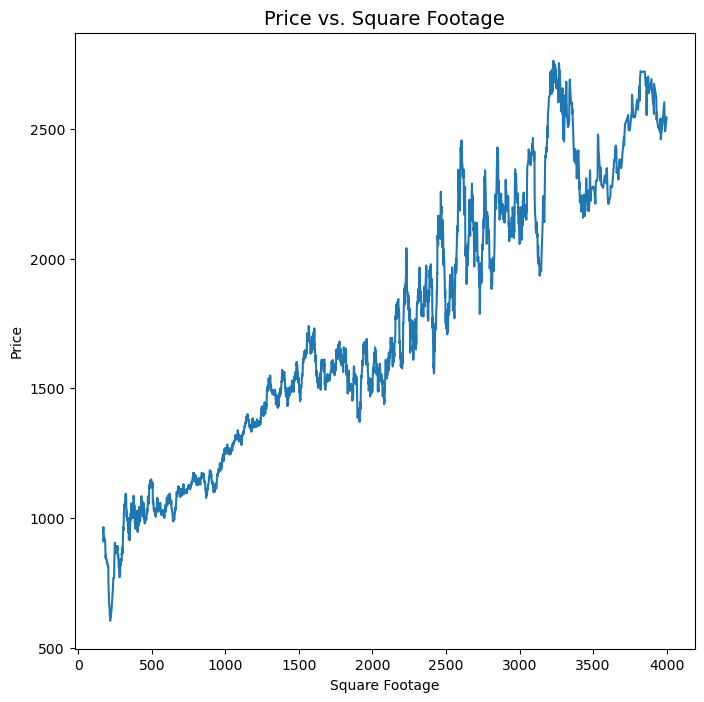

In [290]:
# Group and calculate rolling mean
grouped = df1.groupby("sqfeet")["price"].mean()
rollingGrouped = grouped.rolling(25).mean()

# Define data for the plot
sqfeetData = rollingGrouped.index.values
priceData = rollingGrouped.values

# Create the plot using Matplotlib
plt.figure(figsize=(8,8))
plt.plot(sqfeetData, priceData)
plt.title("Price vs. Square Footage", fontsize=14)
plt.xlabel("Square Footage")
plt.ylabel("Price")

plt.show()

#### Interpretetion

We do see a **positive correaltion** between **'price'** and **'sqfeet'**. As the area of the rental increases (sq. ft.), it becomes more expensive, which is to be expected. 

We will now find out if number of bedrooms affect the price. 

### Comparing price and number of bedrooms

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='beds', ylabel='price'>

Text(0.5, 1.0, 'Average Price vs Number of Bedrooms')

Text(0.5, 0, 'Number of Bedrooms')

Text(0, 0.5, 'Average Price')

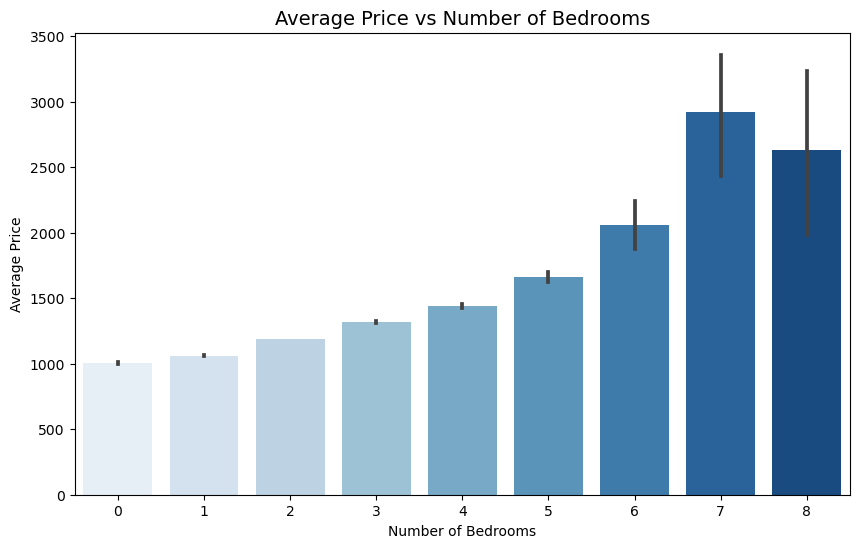

In [291]:
# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='beds', y='price', data=df1, palette='Blues')
plt.title('Average Price vs Number of Bedrooms', fontsize=14)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')

plt.show()

#### Interpretetion

As expected, we can notice a **positive correlation** between the **number of bedrooms** and **price**. As the bedroom number **increases**, the price of a place **goes up as well**. Although it's interesting to see that after 7 bedrooms, the average price is decreased, this might be affected by other factors like place, region or condition of the house.   

### Comparing price and laundry options

We will visualize how different laundry options affect the prices for rentals. 

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='laundry_options', ylabel='price'>

Text(0.5, 1.0, 'Average Price per laundry options')

Text(0.5, 0, 'Laundry options')

Text(0, 0.5, 'Average Price')

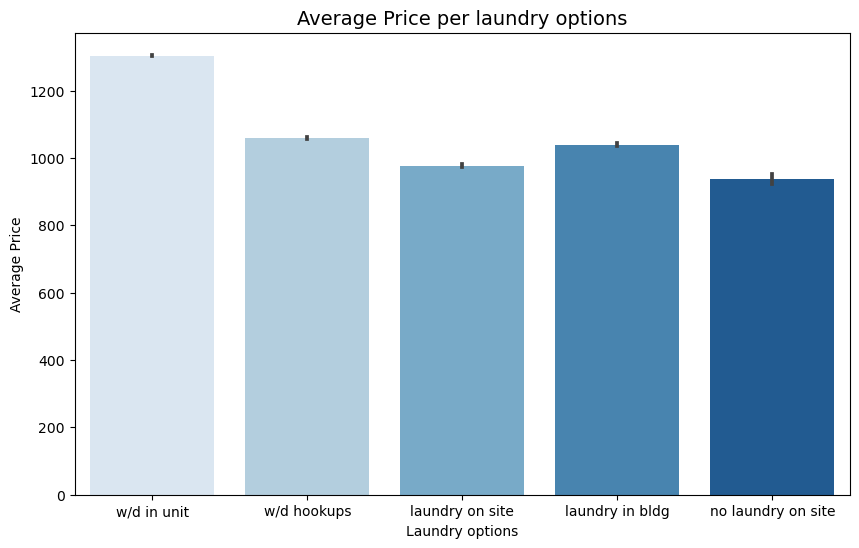

In [292]:
# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='laundry_options', y='price', data=df1, palette='Blues')
plt.title('Average Price per laundry options', fontsize=14)
plt.xlabel('Laundry options')
plt.ylabel('Average Price')

plt.show()

#### Interpretation

- We can clearly notice that rentals are more expensive if they have their own private laundry machines in the unit itself. This shows a **positive correlation.**
- But all the other options like if the laundry is in the building, on site or if the rental is with hookups are almost equal with a difference of approx 30 USD.
- With no surprise, rentals without laundry on site go for the cheapest amongst all. 

### Comparing price and parking option

Lastly, we will see how different parking options affects rental's price.

<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='parking_options', ylabel='price'>

Text(0.5, 1.0, 'Average Price by parking option')

Text(0.5, 0, 'parking options')

Text(0, 0.5, 'Average Price')

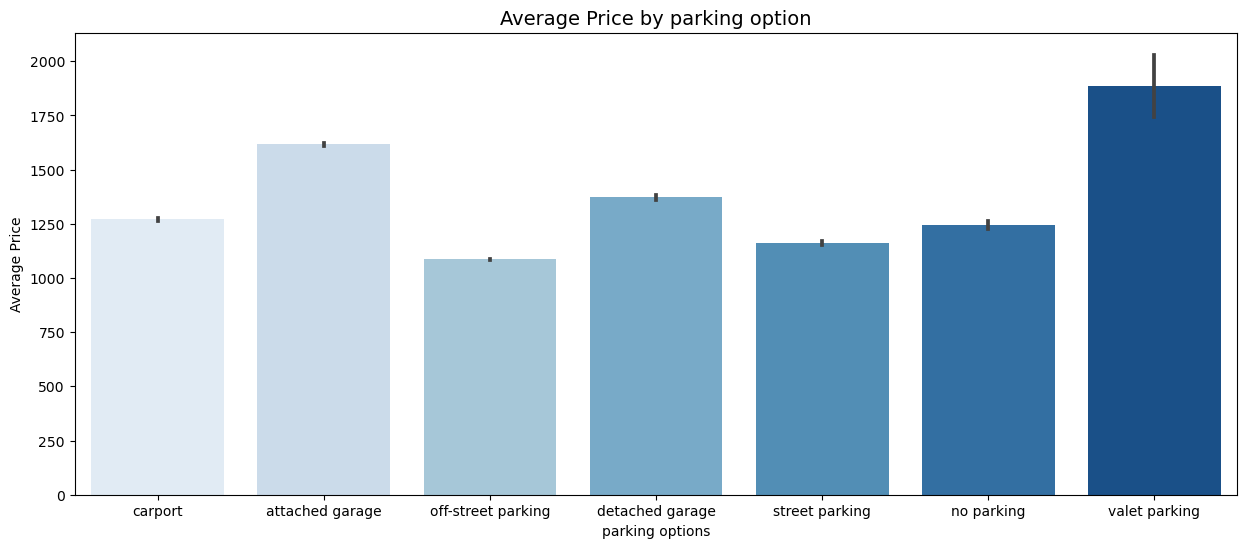

In [293]:
# Create a barplot
plt.figure(figsize=(15, 6))
sns.barplot(x='parking_options', y='price', data=df1, palette='Blues')
plt.title('Average Price by parking option', fontsize=14)
plt.xlabel('parking options')
plt.ylabel('Average Price')

plt.show()

In [294]:
# Get value counts of this column
df['parking_options'].value_counts()

parking_options
off-street parking    266905
attached garage        40361
carport                38488
detached garage        16821
street parking         15835
no parking              3166
valet parking            162
Name: count, dtype: int64

#### Interpretetion

- As we can see in this graph, despite having the largest value count, **'off-street parking'** is the **cheapest** amongst all.
- Following that are the rentals with **'street parking'**.
- Rentals with **attached garage** go for a lot more taking the **second place**.
- The **most expensive places** to rent are those with **valet parking**. These might be high end hotels and resorts. 

---

### Distribution of Binary columns

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 0.98, 'Binary Column Bar Charts')

<Axes: >

<Axes: xlabel='cats_allowed'>

Text(0.5, 1.0, 'cats_allowed')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Count')

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

<Axes: >

<Axes: xlabel='dogs_allowed'>

Text(0.5, 1.0, 'dogs_allowed')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Count')

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

<Axes: >

<Axes: xlabel='smoking_allowed'>

Text(0.5, 1.0, 'smoking_allowed')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Count')

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

<Axes: >

<Axes: xlabel='wheelchair_access'>

Text(0.5, 1.0, 'wheelchair_access')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Count')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

<Axes: >

<Axes: xlabel='electric_vehicle_charge'>

Text(0.5, 1.0, 'electric_vehicle_charge')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Count')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

<Axes: >

<Axes: xlabel='comes_furnished'>

Text(0.5, 1.0, 'comes_furnished')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Count')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

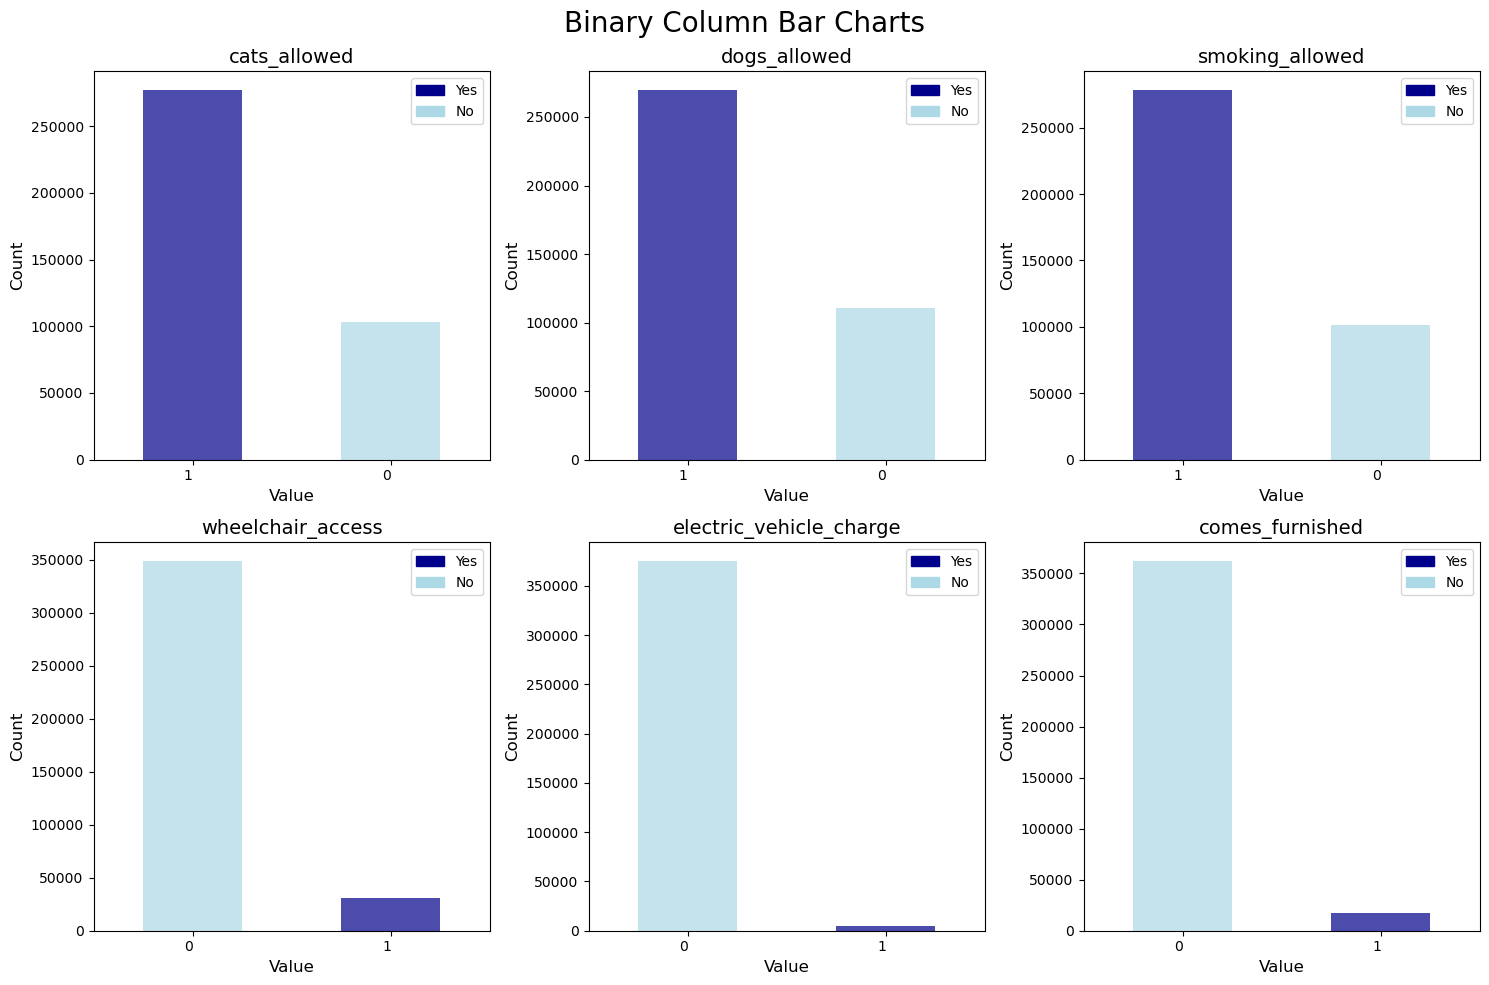

In [295]:
# Define our Binary columns
binary_columns = ["cats_allowed", "dogs_allowed", "smoking_allowed", "wheelchair_access", "electric_vehicle_charge", "comes_furnished"]

# Define colors for 1 and 0
colors = {1: 'darkblue', 0: 'lightblue'}

# Create a single figure for all bar charts
plt.figure(figsize=(15, 10))
plt.suptitle('Binary Column Bar Charts', fontsize=20)

# Loop through binary columns and create bar charts with legend
for i, column in enumerate(binary_columns, 1):
    plt.subplot(2, 3, i)
    value_counts = df1[column].value_counts()
    value_counts.plot(kind='bar', color=[colors.get(value, 'gray') for value in value_counts.index], alpha=0.7)
    plt.title(column, fontsize=14)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=360, ha="right")
    # Create a legend
    legend_labels = {1: "Yes", 0: "No"}
    handles = [plt.Rectangle((0,0),1,1, color=colors[key]) for key in legend_labels]
    plt.legend(handles, [legend_labels[key] for key in legend_labels])
    
plt.tight_layout()
plt.show()

### Interpretetion

Lets check how many housing rentals allow cats, dogs, smoking, have wheelchair access, have EV chargers and come furnished.

#### Cats Allowed

In [296]:
# Get value counts of this column
df1['cats_allowed'].value_counts()

cats_allowed
1    277143
0    103010
Name: count, dtype: int64

In [297]:
# Create a dictionary of value counts of each unique item in this column. 
cats = dict(df1.cats_allowed.value_counts())


# Print out the Percentage of people who allow and don't allow cats 
print(f"{cats[1]} listings allow cats ({round((cats[1] / df1.shape[0]) * 100, 2)}%) while {cats[0]} listings do not ({round((cats[0] / df1.shape[0]) * 100, 2)}%).")

277143 listings allow cats (72.9%) while 103010 listings do not (27.1%).


#### Dogs allowed

In [298]:
# Get value counts of this column
df1['dogs_allowed'].value_counts()

dogs_allowed
1    269802
0    110351
Name: count, dtype: int64

In [299]:
# Create a dictionary of value counts of each unique item in this column. 
dogs = dict(df1.dogs_allowed.value_counts())

# Print out the Percentage of people who allow and don't allow dogs.
print(f"{dogs[1]} listings allow dogs ({round((dogs[1] / df1.shape[0]) * 100, 2)}%) while {dogs[0]} listings do not ({round((dogs[0] / df1.shape[0]) * 100, 2)}%).")

269802 listings allow dogs (70.97%) while 110351 listings do not (29.03%).


#### Allowed smoking

In [300]:
# Get value counts of this column
df1['smoking_allowed'].value_counts()

smoking_allowed
1    278496
0    101657
Name: count, dtype: int64

In [301]:
# Create a dictionary of value counts of each unique item in this column. 
smoking = dict(df1.smoking_allowed.value_counts())

# Print out the Percentage of people who allow and don't allow smoking.
print(f"{smoking[1]} listings allow smoking ({round((smoking[1] / df1.shape[0]) * 100, 2)}%) while {smoking[0]} listings do not ({round((smoking[0] / df1.shape[0]) * 100, 2)}%).")

278496 listings allow smoking (73.26%) while 101657 listings do not (26.74%).


#### Wheelchair access

In [302]:
# Get value counts of this column
df1['wheelchair_access'].value_counts()

wheelchair_access
0    348991
1     31162
Name: count, dtype: int64

In [303]:
# Create a dictionary of value counts of each unique item in this column. 
wheelchair = dict(df1.wheelchair_access.value_counts())

# Print out the Percentage of people who have and don't have wheelchair access in their homes.
print(f"{wheelchair[1]} listings have wheelchair access ({round((wheelchair[1] / df1.shape[0]) * 100, 2)}%) while {wheelchair[0]} listings do not ({round((wheelchair[0] / df1.shape[0]) * 100, 2)}%).")

31162 listings have wheelchair access (8.2%) while 348991 listings do not (91.8%).


#### Electric vehicle charge

In [304]:
# Get value counts of this column
df1['electric_vehicle_charge'].value_counts()

electric_vehicle_charge
0    375281
1      4872
Name: count, dtype: int64

In [305]:
# Create a dictionary of value counts of each unique item in this column. 
evCharge = dict(df1.electric_vehicle_charge.value_counts())

# Print out the Percentage of rentals which have and don't have Electric vehicle charging access.
print(f"{evCharge[1]} listings have Electric vehicle charging access ({round((evCharge[1] / df1.shape[0]) * 100, 2)}%) while {evCharge[0]} listings do not ({round((evCharge[0] / df1.shape[0]) * 100, 2)}%).")

4872 listings have Electric vehicle charging access (1.28%) while 375281 listings do not (98.72%).


#### Comes Furnished

In [306]:
# Get value counts of this column
df1['comes_furnished'].value_counts()

comes_furnished
0    362344
1     17809
Name: count, dtype: int64

In [307]:
# Create a dictionary of value counts of each unique item in this column. 
furnished = dict(df1.comes_furnished.value_counts())

# Print out the Percentage of  rentals that come furnished vs not furnished. .
print(f"{furnished[1]} listings come furnished ({round((furnished[1] / df1.shape[0]) * 100, 2)}%) while {furnished[0]} listings do not ({round((furnished[0] / df1.shape[0]) * 100, 2)}%).")

17809 listings come furnished (4.68%) while 362344 listings do not (95.32%).


### Rental Prices broken down by State

To compare the average rental prices in each state, first we need to find out how many distinct states we have in our dataset.

In [308]:
# First we see all the unique values in this column.
df1['state'].unique()

array(['ca', 'co', 'ct', 'dc', 'fl', 'de', 'ga', 'hi', 'id', 'il', 'in',
       'ia', 'ks', 'ky', 'la', 'me', 'mi', 'md', 'ma', 'mn', 'ms', 'nc',
       'mo', 'mt', 'ne', 'nv', 'nj', 'nm', 'ny', 'nh', 'oh', 'nd', 'ok',
       'or', 'pa', 'ri', 'sc', 'tn', 'sd', 'tx', 'ut', 'va', 'vt', 'wa',
       'wv', 'wi', 'wy', 'al', 'az', 'ak', 'ar'], dtype=object)

In our dataset, we have the US state names abbreviated in lower case, however, to make an interactive plotly map, we have to change them to upper case letters.
So, we will create a new column called ***"state_full"*** which will hold the upper case abbreviated values of all the states. 

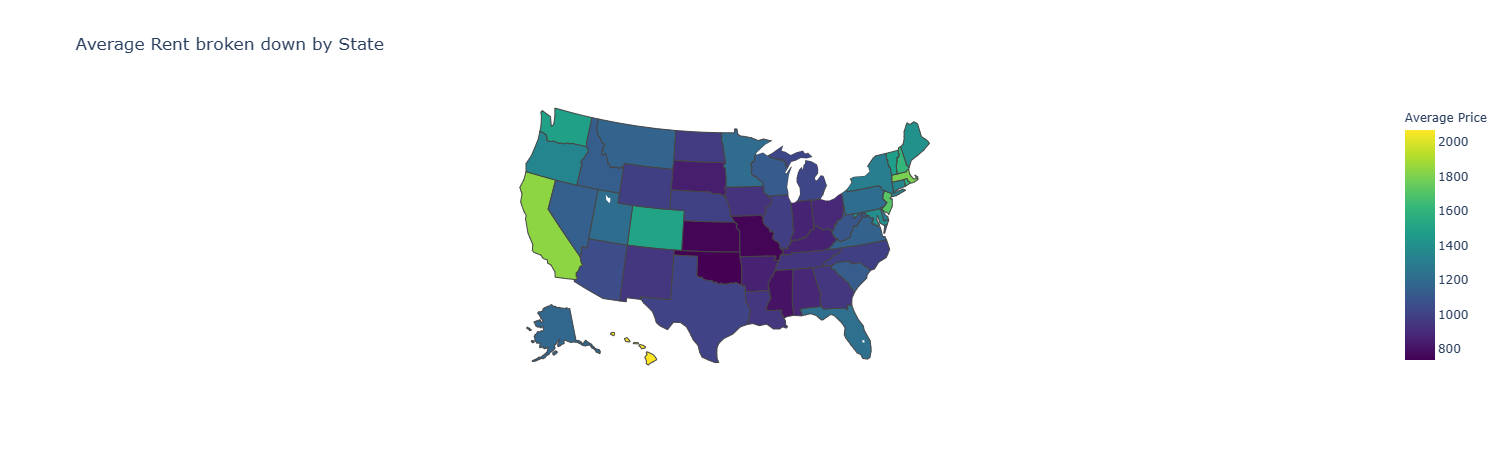

In [309]:
# Make the interactive map
state_mapping = {
'ca' : 'CA',
'co' : 'CO',
'ct' : 'CT',
'dc' : 'DC',
'fl' : 'FL',
'de' : 'DE',
'ga' : 'GA',
'hi' : 'HI',
'id' : 'ID',
'il' : 'IL',
'in' : 'IN',
'ia' : 'IA',
'ks' : 'KS',
'ky' : 'KY',
'la' : 'LA',
'me' : 'ME',
'mi' : 'MI',
'md' : 'MD',
'ma' : 'MA',
'mn' : 'MN',
'ms' : 'MS',
'nc' : 'NC',
'mo' : 'MO',
'mt' : 'MT',
'ne' : 'NE',
'nv' : 'NV',
'nj' : 'NJ',
'nm' : 'NM',
'ny' : 'NY',
'nh' : 'NH',
'oh' : 'OH',
'nd' : 'ND',
'ok' : 'OK',
'or' : 'OR',
'pa' : 'PA',
'ri' : 'RI',
'sc' : 'SC',
'tn' : 'TN',
'sd' : 'SD',
'tx' : 'TX',
'ut' : 'UT',
'va' : 'VA',
'vt' : 'VT',
'wa' : 'WA',
'wv' : 'WV',
'wi' : 'WI',
'wy' : 'WY',
'al' : 'AL',
'az' : 'AZ',
'ak' : 'AK',
'ar' : 'AR'
}

# Apply the mapping to your DataFrame, creating a new column called 'state_full' containing upper case abbreviations.
df1['state_full'] = df1['state'].map(state_mapping)

# Group the data by 'state_full' and calculate the mean price for each state
state_price = df1.groupby('state_full')['price'].mean().reset_index()

# Create a choropleth map with full state names
fig = px.choropleth(state_price,
                    locations='state_full',
                    locationmode="USA-states",
                    color='price',
                    color_continuous_scale="Viridis",
                    scope="usa",
                    labels={'price': 'Average Price'},
                    title='Average Rent broken down by State')

fig.show()

To see the average prices, we can hover over the states and look for it. But we will also be making a table showing all the values which would make it a little easier to analyse. 

In [310]:
# To get the average prices. 
state_price.head()

,state_full,price
0,AK,1175.663412
1,AL,881.596911
2,AR,863.607405
3,AZ,1052.129520
4,CA,1842.955907


Then we will sort the table in **descending order** to analyze the average rents in each state. 

In [311]:
# Sort "state_price" in descending.
state_price_sorted = state_price.sort_values(by='price', ascending=False)
state_price_sorted

,state_full,price
11,HI,2073.425402
7,DC,1885.727606
4,CA,1842.955907
19,MA,1799.046385
31,NJ,1715.429883
30,NH,1621.716324
39,RI,1597.472252
5,CO,1508.665331
47,WA,1489.725143
46,VT,1478.361702


#### Interpretetion

- As per this table, **Hawaii** is the most expensive state to rent in, average rent being **2073.42 USD**. 
- The second most expensive state is the **District of Columbia** with **1885.72 USD** mean rent. 
- **California** ranks number three with an average rent of **1842.95 USD**. 
- Coming to the cheaper ones, **Olkahoma** seems to be the cheapest state when it comes to average rents having as low as **736.84 USD**.
- **Missouri** ranks second to last with **750.31 USD** mean.

---

### Distributions using Pie chart

At last, we will be using pie charts to see the distribution of **Housing types, Laundry and Parking options**.

### 1. Distribution of Housing types ('types')

In [312]:
# Get value counts
df1['type'].value_counts()

type
apartment          314858
house               32308
townhouse           15712
condo                6091
duplex               4978
manufactured         4104
cottage/cabin         723
loft                  682
flat                  521
in-law                169
land                    5
assisted living         2
Name: count, dtype: int64

Now, let's visualize this on a pie chart.

(-1.0999999504647415,
 1.0999999859173217,
 -1.0999999990032503,
 1.0999999998477838)

Text(0.5, 1.0, 'Distribution of Housing Types')

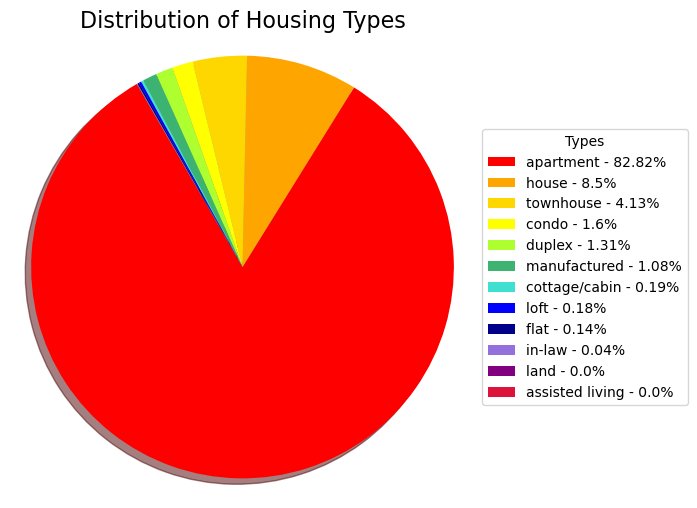

In [313]:
# Create a dictionary of value counts of each unique item in this column. 
types = dict(df1['type'].value_counts())

# Define colors for the pie chart
base_colors = ["red", "orange", "gold", "yellow", "greenyellow", "mediumseagreen", "turquoise", "blue", "darkblue", "mediumpurple", "purple", "crimson"]
colors = base_colors[:len(types)]

# Create labels, sizes, and colors for the pie chart
labels = [f"{k} - {round(((v / df1.shape[0]) * 100), 2)}%" for k, v in types.items()]
sizes = list(types.values())

# Create the pie chart without labels
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(sizes, colors=colors, shadow=True, startangle=120, autopct='', pctdistance=0.85)
ax.axis('equal')
ax.set_title("Distribution of Housing Types", fontsize=16)

# Add a legend on the side
ax.legend(labels, title="Types", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

#### Interpretation

- **'Apartment'** is the most common housing type, with a significant number of listings **(314,858)**, indicating that apartment rentals are prevalent.
- **'House'** is the second most common type, with **32,308** listings, suggesting that standalone houses are also readily available.
- **'Townhouse'** listings are notable, with **15,712** properties in this category.
- **'Condo'** listings are found in **6,091** instances, indicating condominiums as another popular housing choice.
- **'Duplex'** and 'Manufactured' homes also have a considerable presence, with **4,978** and **4,104** listings, respectively.
- **'Cottage/cabin', 'Loft', 'Flat', 'In-law'**, and **'Land'** are less common housing types, while **'Assisted living'** has the fewest listings.

### 2. Distribution of Laundry options ('laundry_options')

In [314]:
# Get value counts
df['laundry_options'].value_counts()

laundry_options
w/d in unit           209295
w/d hookups            75102
laundry on site        58111
laundry in bldg        35668
no laundry on site      3562
Name: count, dtype: int64

We will proceed to make a visual for analysis. 

(-1.0999991248609116,
 1.0999978506688444,
 -1.0999999693249913,
 1.0999999220415708)

Text(0.5, 1.0, 'Distribution of Laundry Options')

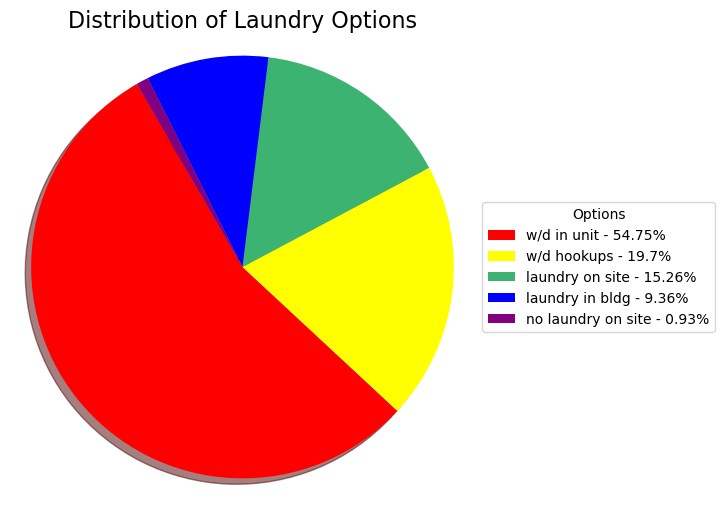

In [315]:
# Create a dictionary of value counts of each unique item in this column. 
laundry = dict(df1['laundry_options'].value_counts())

# Define colors for the pie chart
base_colors = ["red", "yellow", "mediumseagreen", "blue", "purple"]
colors = base_colors[:len(laundry)]

# Create labels, sizes, and colors for the pie chart
labels = [f"{k} - {round(((v / df1.shape[0]) * 100), 2)}%" for k, v in laundry.items()]
sizes = list(laundry.values())

# Create the pie chart without labels
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(sizes, colors=colors, shadow=True, startangle=120, autopct='', pctdistance=0.85)
ax.axis('equal')
ax.set_title("Distribution of Laundry Options", fontsize=16)

# Add a legend on the side
ax.legend(labels, title="Options", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

#### Interpretetion

- **'W/D in unit'** is the most common laundry option, with a substantial number of listings **(209,295)**, indicating that many properties offer in-unit laundry facilities.
- **'W/D hookups'** are also available in a significant number of listings, with **75,102** properties offering this feature.
- **'Laundry on site'** is another common option, found in **58,111 listings**, suggesting that many properties provide shared laundry facilities within the building or complex.
- **'Laundry in bldg'** indicates that laundry facilities are available within the building, and it is offered in **35,668** listings.
- **'No laundry on site'** is the least common option, with only **3,562** listings, signifying properties that do not provide any laundry facilities.

### 3. Distribution of Parking options ('parking_options')

In [316]:
# Get value counts
df['parking_options'].value_counts()

parking_options
off-street parking    266905
attached garage        40361
carport                38488
detached garage        16821
street parking         15835
no parking              3166
valet parking            162
Name: count, dtype: int64

(-1.0999997142270859,
 1.0999970069460758,
 -1.0999986489570317,
 1.0999999347662441)

Text(0.5, 1.0, 'Distribution of Parking Options')

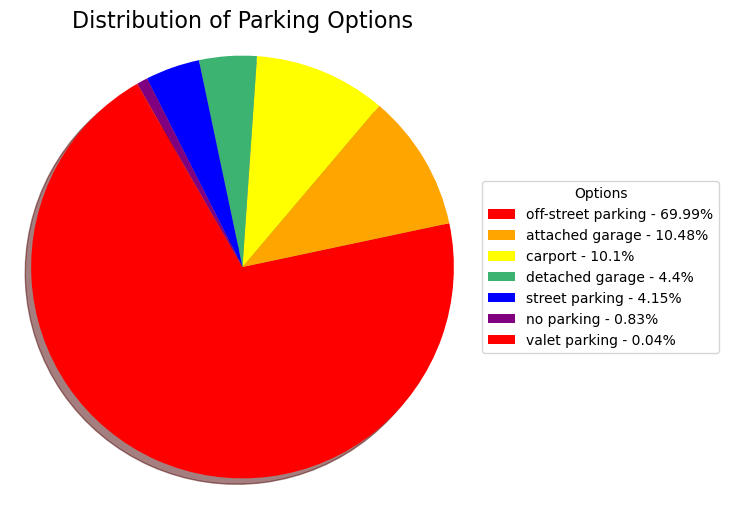

In [317]:
# Create a dictionary of value counts of each unique item in this column. 
parking = dict(df1['parking_options'].value_counts())

# Define colors for the pie chart
base_colors = ["red", "orange", "yellow", "mediumseagreen", "blue", "purple"]
colors = base_colors[:len(parking)]

# Create labels, sizes, and colors for the pie chart
labels = [f"{k} - {round(((v / df1.shape[0]) * 100), 2)}%" for k, v in parking.items()]
sizes = list(parking.values())

# Create the pie chart without labels
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(sizes, colors=colors, shadow=True, startangle=120, autopct='', pctdistance=0.85)
ax.axis('equal')
ax.set_title("Distribution of Parking Options", fontsize=16)

# Add a legend on the side
ax.legend(labels, title="Options", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

#### Interpretetion

- **'Off-street parking'** is the most frequently found parking option, with a significant number of listings **(266,905)**, indicating that a substantial portion of properties offer parking away from the street.
- **'Attached garage'** is a popular choice, present in **40,361** listings, signifying properties that provide parking spaces within attached garages.
- **'Carport'** is also commonly available, with **38,488** listings offering this type of parking structure.
- **'Detached garage'** is accessible in **16,821** listings, indicating properties that feature parking facilities in separate garages.
- **'Street parking'** is an option in **15,835** listings, implying that some properties rely on street parking for vehicles.
- A small portion of listings, totaling **3,1668**, offer **'No parking'** indicating the absence of designated parking spaces.
- **'Valet parking'** is the least common option, with only **162** listings, suggesting a limited availability of valet parking services.

---


### Revised Dataset

In [318]:
# List the remaining columns
df1.columns.tolist()

['region',
 'price',
 'type',
 'sqfeet',
 'beds',
 'baths',
 'cats_allowed',
 'dogs_allowed',
 'smoking_allowed',
 'wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished',
 'laundry_options',
 'parking_options',
 'state',
 'state_full']

These are the distinct columns we have for further data pre-processing and feature engineering.

In [319]:
# Last sanity check
df1.shape

(380153, 16)

After cleaning our dataset further, we have **380,153 rows** and **16 columns** for further analysis.

We are done with data cleaning and EDA, now let's save this cleaned dataset for later use:

In [320]:
# Save the cleaned data to a new .csv file
df1.to_csv('cleaned_dataset_after_EDA.csv', index=False)

---